In [ ]:
import torch
import json
from pprint import pprint
import regex as re
import collections
import matplotlib.pyplot as plt
from pathlib import Path

In [ ]:
! mkdir squad
! wget https://rajpurkar.github.io/SQuAD-explorer/dataset/train-v2.0.json -O squad/train-v2.0.json
! wget https://rajpurkar.github.io/SQuAD-explorer/dataset/dev-v2.0.json -O squad/dev-v2.0.json

mkdir: cannot create directory ‘squad’: File exists
--2020-11-14 18:59:48--  https://rajpurkar.github.io/SQuAD-explorer/dataset/train-v2.0.json
Resolving rajpurkar.github.io (rajpurkar.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to rajpurkar.github.io (rajpurkar.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42123633 (40M) [application/json]
Saving to: ‘squad/train-v2.0.json’

squad/train-v2.0.js 100%[===================>]  40.17M  83.7MB/s    in 0.5s    

2020-11-14 18:59:49 (83.7 MB/s) - ‘squad/train-v2.0.json’ saved [42123633/42123633]

--2020-11-14 18:59:49--  https://rajpurkar.github.io/SQuAD-explorer/dataset/dev-v2.0.json
Resolving rajpurkar.github.io (rajpurkar.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to rajpurkar.github.io (rajpurkar.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4370528 (4.2M) [ap

In [ ]:
def read_squad(path):
    path = Path(path)
    with open(path, 'rb') as f:
        squad_dict = json.load(f)

    contexts = []
    questions = []
    for group in squad_dict['data']:
      for passage in group['paragraphs']:
        context = passage['context']
        for qa in passage['qas']:
          question = qa['question']
          questions.append(question)
            
        
      
    return questions


In [ ]:
def question_type(question):
  type_of_questions = ('who', 'whom', 'how', 'which', 'whose', 'where', 'when', 'what')
  q_type = "other"
  for q in type_of_questions:
    temp_type = re.findall(q, question.lower())
    if len(temp_type) > 0:
      q_type = q
      if q_type == 'whom':  q_type = 'who'
      return q_type
  return q_type

In [ ]:
train_questions = read_squad('squad/train-v2.0.json')
val_questions = read_squad('squad/dev-v2.0.json')
questions = train_questions + val_questions

In [ ]:
question_type_count = {}
for question in questions:
  q_type = question_type(question)
  question_type_count[q_type] = question_type_count.get(q_type, 0) + 1

In [ ]:
print(question_type_count)

{'when': 10114, 'what': 81340, 'which': 9082, 'who': 16128, 'how': 15635, 'where': 5982, 'other': 3911}


In [ ]:
question_type_count = {k: v for k, v in sorted(question_type_count.items(), key=lambda item: item[1])}


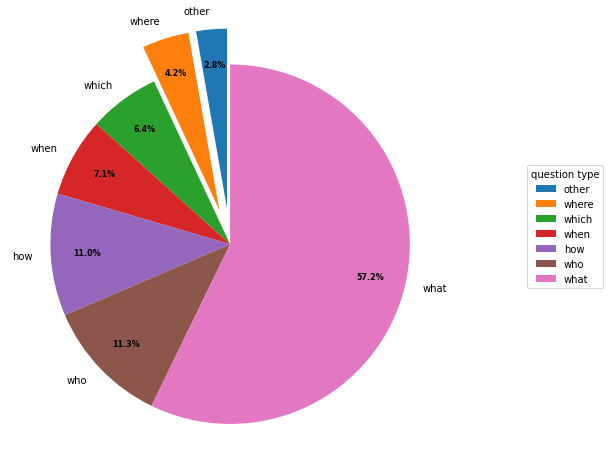

In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = question_type_count.keys()
sizes = question_type_count.values()

# Creating explode data 
explode = [0.2, 0.2, 0, 0, 0, 0, 0]
 
fig1, ax1 = plt.subplots(figsize=(8,8))
wedges, texts, autotexts = ax1.pie(sizes, labels=labels, autopct='%0.1f%%',
                                   pctdistance=0.8, labeldistance=1.1, shadow=False, startangle=90, explode=explode)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
  
# Adding legend 
ax1.legend(wedges, labels, 
          title ="question type", 
          loc = 'center',
          bbox_to_anchor =(1, 0, 0.5, 1)) 
  
plt.setp(autotexts, size = 8, weight ="bold") 

fig1.patch.set_facecolor('white')
plt.show()